In [329]:
# Vectorizer and Model imports:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

In [330]:
!pip install regex

In [331]:
LA_df = pd.read_csv('LA_df.csv')

In [332]:
LA_df.head()

,author,num_comments,score,selftext,subreddit,title,selftext_title,text,snow_text,texty,string,stringOG
0,AutoModerator,33,10,Daily discussion about anything Lakers related...,lakers,Daily Lakers Discussion Thread - July 11,Daily discussion about anything Lakers related...,Daily discussion about anything Lakers related...,"['daili', 'discuss', 'about', 'anyth', 'laker'...",['daili discuss about anyth laker relat off to...,['daili discuss about anyth laker relat off to...,daili discuss about anyth laker relat off topi...
1,rickat99,63,877,,lakers,Whatever it takes,Whatever it takes,Whatever it takes,"['whatev', 'it', 'take']",['whatev it take'],['whatev it take'],whatev it take
2,djmcc28,42,237,,lakers,Two GOATs 🐐🐐,Two GOATs 🐐🐐,Two GOATs 🐐🐐,"['two', 'goat']",['two goat'],['two goat'],two goat
3,Masicka636,17,154,,lakers,Our Boys!,Our Boys!,Our Boys!,"['our', 'boy']",['our boy'],['our boy'],our boy
4,daftmunt,250,2270,,lakers,"[Moreno] DeMarcus Cousins: ""My quad is 100% he...","[Moreno] DeMarcus Cousins: ""My quad is 100% ...","[Moreno] DeMarcus Cousins: ""My quad is 100% ...","['moreno', 'demarcus', 'cousin', 'my', 'quad',...",['moreno demarcus cousin my quad is 100 heal m...,['moreno demarcus cousin my quad is 100 heal m...,moreno demarcus cousin my quad is 100 heal my ...


In [333]:
cvec = CountVectorizer(stop_words=['Lakers','Clippers','english','LeBron','AD','Kawhi','PG'])

In [334]:
cvec.fit(words)

/Users/christopherthompson/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ad', 'clippers', 'kawhi', 'lakers', 'lebron', 'pg'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['Lakers', 'Clippers', 'english', 'LeBron', 'AD', 'Kawhi', 'PG'],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [335]:
# Transform the corpus
X_train = cvec.transform(words)
print(type(X_train))
print(X_train)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 2)	1
  (1, 3)	1
  (2, 0)	1
  (3, 7)	1
  (4, 15)	1
  (5, 19)	1
  (6, 1)	1
  (7, 16)	1
  (8, 12)	1
  (9, 1)	1
  (10, 17)	1
  (11, 10)	1
  (12, 13)	1
  (13, 8)	1
  (14, 9)	1
  (15, 4)	1
  (16, 5)	1
  (17, 11)	1
  (18, 14)	1
  (19, 2)	1
  (20, 7)	1
  (21, 3)	1
  (22, 18)	1
  (23, 6)	1


In [336]:
# Convert X_train into a DataFrame
X_train_df = pd.DataFrame(X_train.toarray(),
                   columns=cvec.get_feature_names())
X_train_df

,anything,conversations,daily,discussion,effort,ideas,july,lakers,leave,low,merch,new,playoff,please,queue,related,season,share,thread,topic
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [337]:
# Transform test
X_test = cvec.transform(words)
X_test_df = pd.DataFrame(X_test.toarray(), columns=cvec.get_feature_names())
X_test_df

,anything,conversations,daily,discussion,effort,ideas,july,lakers,leave,low,merch,new,playoff,please,queue,related,season,share,thread,topic
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Map over subreddit

In [338]:
LA_df['subreddit'] = LA_df['subreddit'].map({'LAClippers': 0, 'lakers': 1})

In [339]:
LA_df.head()

,author,num_comments,score,selftext,subreddit,title,selftext_title,text,snow_text,texty,string,stringOG
0,AutoModerator,33,10,Daily discussion about anything Lakers related...,1,Daily Lakers Discussion Thread - July 11,Daily discussion about anything Lakers related...,Daily discussion about anything Lakers related...,"['daili', 'discuss', 'about', 'anyth', 'laker'...",['daili discuss about anyth laker relat off to...,['daili discuss about anyth laker relat off to...,daili discuss about anyth laker relat off topi...
1,rickat99,63,877,,1,Whatever it takes,Whatever it takes,Whatever it takes,"['whatev', 'it', 'take']",['whatev it take'],['whatev it take'],whatev it take
2,djmcc28,42,237,,1,Two GOATs 🐐🐐,Two GOATs 🐐🐐,Two GOATs 🐐🐐,"['two', 'goat']",['two goat'],['two goat'],two goat
3,Masicka636,17,154,,1,Our Boys!,Our Boys!,Our Boys!,"['our', 'boy']",['our boy'],['our boy'],our boy
4,daftmunt,250,2270,,1,"[Moreno] DeMarcus Cousins: ""My quad is 100% he...","[Moreno] DeMarcus Cousins: ""My quad is 100% ...","[Moreno] DeMarcus Cousins: ""My quad is 100% ...","['moreno', 'demarcus', 'cousin', 'my', 'quad',...",['moreno demarcus cousin my quad is 100 heal m...,['moreno demarcus cousin my quad is 100 heal m...,moreno demarcus cousin my quad is 100 heal my ...


## Baseline

In [340]:
LA_df['subreddit'].value_counts(normalize=True)

0    0.528893
1    0.471107
Name: subreddit, dtype: float64

## Choose X & Y

In [341]:
X = LA_df['selftext_title']
y = LA_df['subreddit']

## Train, test, split

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

## Instantiate

In [343]:
cvec = CountVectorizer()
tvec = TfidfVectorizer()
lr = LogisticRegression()
bnb = BernoulliNB()

In [344]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression())
])

In [345]:
bn_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('bnb', BernoulliNB())
])

## Cross val fit & score

In [346]:
# Evaluate how your model will perform on unseen data
cross_val_score(pipe, X_train, y_train, cv=3).mean() 

/Users/christopherthompson/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9275791466803409

In [347]:
# Fit your model
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('cvec', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

## Best score

In [348]:
# Training score
pipe.score(X_train, y_train)

0.9910244506344785

In [349]:
# Test score
pipe.score(X_test, y_test)

0.9601113172541744

In [350]:

pipe_params = {
    'cvec__max_features': [2500, 3000, 3500],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)]
}
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=3)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

/Users/christopherthompson/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9213865676261219


{'cvec__max_df': 0.9,
 'cvec__max_features': 3500,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2)}

In [351]:
gs.score(X_train, y_train)

0.9820489012689569

In [352]:
gs.score(X_test, y_test)

0.9461966604823747

In [353]:
cross_val_score(bn_tvec, X_train, y_train, cv=3)

array([0.78756957, 0.7818013 , 0.78252788])

## Bernouli Bayes Model

In [354]:
bn_tvec.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tvec', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
... vocabulary=None)), ('bnb', BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True))])

In [355]:
bn_tvec.score(X_train, y_train)

0.8378211080160941

In [356]:
bn_tvec.score(X_test, y_test)

0.8181818181818182

In [357]:
best_pipe = gs.best_estimator_

In [358]:
coefs = np.exp(best_pipe.named_steps['lr'].coef_)

In [359]:
coefs

array([[0.85002169, 0.94025589, 0.7357829 , ..., 1.03165608, 0.33864321,
        0.25954405]])

In [360]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import numpy as np

In [361]:
#making the pipeline- this is the best regression and vectorizer based on numerous testing
pipe = make_pipeline(
    CountVectorizer(),
    LogisticRegression()
)

In [362]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [363]:
pipe.fit(X_train, y_train)

pipe.named_steps

/Users/christopherthompson/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'countvectorizer': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=1.0, max_features=None, min_df=1,
         ngram_range=(1, 1), preprocessor=None, stop_words=None,
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False)}

In [364]:
#creating coef and features to put in dictionary then creating a df from dict
coef = np.exp(pipe.named_steps['logisticregression'].coef_)[0]

features = pipe.named_steps['countvectorizer'].get_feature_names()

feat_dict = dict(zip(features, coef))

coef_df = pd.DataFrame.from_dict(feat_dict, orient = 'index')

#Blake's code

In [365]:
#creating column corr to sort it
coef_df.columns = ['corr']
coef_df.sort_values(by = 'corr', ascending = False).head(30)

,corr
lebron,14.286662
kobe,7.228358
ad,7.174396
boogie,6.453301
danny,5.269677
caruso,4.861498
laker,4.594946
kuz,4.293091
appreciate,4.153922
rob,4.077816


## Heatmap

In [366]:
import seaborn as sns

Text(0.5, 32.0, 'Coefficient')

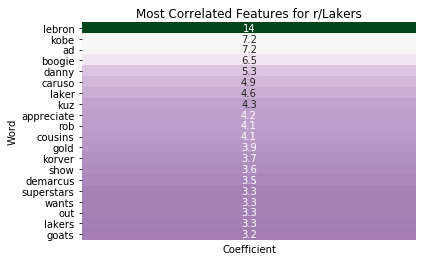

In [367]:
sns.heatmap(coef_df.sort_values(by='corr', ascending=False).head(20),
           cmap='PRGn',
           vmin=0,
           annot=True,
           cbar=False,
           xticklabels=False
          )
plt.title('Most Correlated Features for r/Lakers')
plt.ylabel('Word')
plt.xlabel('Coefficient')

In [368]:
#making the pipeline- this is the best regression and vectorizer based on numerous testing
pipe2 = make_pipeline(
    CountVectorizer(ngram_range=(2,2)),
    LogisticRegression()
)

In [369]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [370]:
pipe2.fit(X_train, y_train)

pipe2.named_steps

/Users/christopherthompson/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'countvectorizer': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=1.0, max_features=None, min_df=1,
         ngram_range=(2, 2), preprocessor=None, stop_words=None,
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False)}

In [371]:
#creating coef and features to put in dictionary then creating a df from dict
coef = np.exp(pipe2.named_steps['logisticregression'].coef_)[0]

features = pipe2.named_steps['countvectorizer'].get_feature_names()

feat_dict = dict(zip(features, coef))

pipe2_df = pd.DataFrame.from_dict(feat_dict, orient = 'index')

#Blake's code

In [372]:
#creating column corr to sort it
pipe2_df.columns = ['corr']
pipe2_df.sort_values(by = 'corr', ascending = False).head(30)

,corr
demarcus cousins,6.086795
danny green,5.976601
lebron james,5.276508
anthony davis,4.242937
avery bradley,4.078466
quinn cook,3.224647
two goats,3.042880
our kids,3.042880
upvote party,3.042672
rob pelinka,2.896004


Text(0.5, 32.0, 'Coefficient')

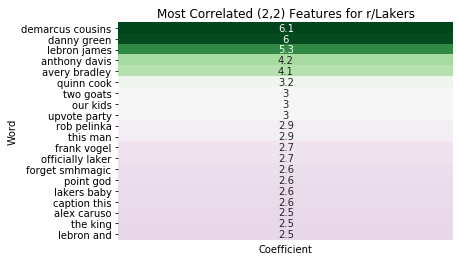

In [373]:
sns.heatmap(pipe2_df.sort_values(by='corr', ascending=False).head(20),
           cmap='PRGn',
           vmin=0,
           annot=True,
           cbar=False,
           xticklabels=False
          )
plt.title('Most Correlated (2,2) Features for r/Lakers')
plt.ylabel('Word')
plt.xlabel('Coefficient')

## Change binary class

In [374]:
#changing binary- now anxiety is marked 1
LA_df['subreddit'] = LA_df['subreddit'].map({0: 1, 1:0})

In [375]:
#making the pipeline- this is the best regression and vectorizer based on testing
pipe = make_pipeline(
    CountVectorizer(),
    LogisticRegression()
)

In [376]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [377]:
pipe.fit(X_train, y_train)

pipe.named_steps

/Users/christopherthompson/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'countvectorizer': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=1.0, max_features=None, min_df=1,
         ngram_range=(1, 1), preprocessor=None, stop_words=None,
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False)}

In [378]:
LA_df.head()

,author,num_comments,score,selftext,subreddit,title,selftext_title,text,snow_text,texty,string,stringOG
0,AutoModerator,33,10,Daily discussion about anything Lakers related...,0,Daily Lakers Discussion Thread - July 11,Daily discussion about anything Lakers related...,Daily discussion about anything Lakers related...,"['daili', 'discuss', 'about', 'anyth', 'laker'...",['daili discuss about anyth laker relat off to...,['daili discuss about anyth laker relat off to...,daili discuss about anyth laker relat off topi...
1,rickat99,63,877,,0,Whatever it takes,Whatever it takes,Whatever it takes,"['whatev', 'it', 'take']",['whatev it take'],['whatev it take'],whatev it take
2,djmcc28,42,237,,0,Two GOATs 🐐🐐,Two GOATs 🐐🐐,Two GOATs 🐐🐐,"['two', 'goat']",['two goat'],['two goat'],two goat
3,Masicka636,17,154,,0,Our Boys!,Our Boys!,Our Boys!,"['our', 'boy']",['our boy'],['our boy'],our boy
4,daftmunt,250,2270,,0,"[Moreno] DeMarcus Cousins: ""My quad is 100% he...","[Moreno] DeMarcus Cousins: ""My quad is 100% ...","[Moreno] DeMarcus Cousins: ""My quad is 100% ...","['moreno', 'demarcus', 'cousin', 'my', 'quad',...",['moreno demarcus cousin my quad is 100 heal m...,['moreno demarcus cousin my quad is 100 heal m...,moreno demarcus cousin my quad is 100 heal my ...


In [379]:
#creating coef and features to put in dictionary then creating a df from dict
coef = np.exp(pipe.named_steps['logisticregression'].coef_)[0]

features = pipe.named_steps['countvectorizer'].get_feature_names()

feat_dict = dict(zip(features, coef))

coef_Clip = pd.DataFrame.from_dict(feat_dict, orient = 'index')

#Blake's code

In [380]:
#creating column corr to sort it
coef_Clip.columns = ['corr']
coef_Clip.sort_values(by = 'corr', ascending = False).head(30)

,corr
kawhi,8.544121
ralph,7.523325
clippers,6.708788
shai,6.382265
fuck,6.359710
pg,5.097437
jerry,4.612042
pingalord,4.604275
woj,4.516157
news,3.900143


Text(0.5, 32.0, 'Coefficient')

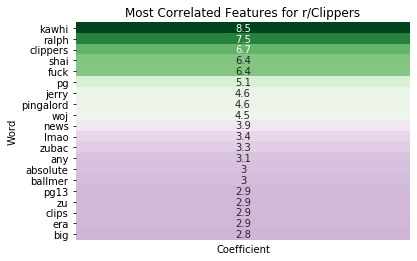

In [381]:
sns.heatmap(coef_Clip.sort_values(by='corr', ascending=False).head(20),
           cmap='PRGn',
           vmin=0,
           annot=True,
           cbar=False,
           xticklabels=False
          )
plt.title('Most Correlated Features for r/Clippers')
plt.ylabel('Word')
plt.xlabel('Coefficient')

In [382]:
#making the pipeline- this is the best regression and vectorizer based on numerous testing
pipe2 = make_pipeline(
    CountVectorizer(ngram_range=(2,2)),
    LogisticRegression()
)

In [383]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [384]:
pipe2.fit(X_train, y_train)

pipe2.named_steps

/Users/christopherthompson/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'countvectorizer': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=1.0, max_features=None, min_df=1,
         ngram_range=(2, 2), preprocessor=None, stop_words=None,
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False)}

In [385]:
#creating coef and features to put in dictionary then creating a df from dict
coef = np.exp(pipe2.named_steps['logisticregression'].coef_)[0]

features = pipe2.named_steps['countvectorizer'].get_feature_names()

feat_dict = dict(zip(features, coef))

pipe2_df = pd.DataFrame.from_dict(feat_dict, orient = 'index')

#Blake's code

In [386]:
#creating column corr to sort it
pipe2_df.columns = ['corr']
pipe2_df.sort_values(by = 'corr', ascending = False).head(30)

,corr
the clippers,6.222933
jerry west,4.556845
kawhi leonard,4.433151
paul george,4.118323
kawhi and,3.453934
and pg,3.377156
la clippers,3.332236
fuck the,3.234379
welcome home,3.053621
praise pingalord,3.012573


Text(0.5, 32.0, 'Coefficient')

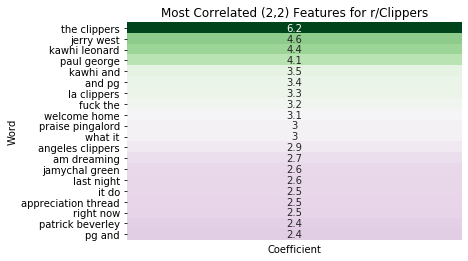

In [387]:
sns.heatmap(pipe2_df.sort_values(by='corr', ascending=False).head(20),
           cmap='PRGn',
           vmin=0,
           annot=True,
           cbar=False,
           xticklabels=False
          )
plt.title('Most Correlated (2,2) Features for r/Clippers')
plt.ylabel('Word')
plt.xlabel('Coefficient')